# Calculating Bond Option Adjusted Spread (OAS)

In [1]:
# This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; 
# without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  
# See the license for more details.

The asset swap spread and the option adjusted spread are widely used as measures of pure credit risk. In this notebook I calculate these quantities. This bond does not have embedded optionality. Hence OAS performs a role of a credit spread.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.finutils.FinError import FinError
from financepy.finutils.FinFrequency import FinFrequencyTypes
from financepy.finutils.FinDayCount import FinDayCountTypes
from financepy.finutils.FinDate import FinDate
from financepy.products.bonds.FinBond import FinBond, FinYieldConventions

In [4]:
maturityDate = FinDate(2027, 5, 15)
coupon = 0.02375
freqType = FinFrequencyTypes.SEMI_ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA
face = 100.0 # By setting the face to 100 we expect a price of par to be 100.0

In [5]:
bond = FinBond(maturityDate, coupon, freqType, accrualType, face)

In [6]:
bond.print()

MATURITY DATE: SAT 15 MAY 2027
COUPON: 0.02375
FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
ACCRUAL TYPE: FinDayCountTypes.ACT_ACT_ICMA
FACE: 100.0


## Option Adjusted Spread

In [7]:
from financepy.market.curves.FinFlatCurve import FinFlatCurve

In [8]:
liborFlatRate = 0.0275

In [9]:
settlementDate = FinDate(2017, 7, 21)

In [10]:
liborFlatCurve = FinFlatCurve(settlementDate, liborFlatRate, 2)

To get the OAS I need to know the bond price

In [11]:
cleanPrice = 99.780842  # I specified face to be 100 - if face is 1 then this must be 0.99780842

OAS is similar to ASW but actually subtly different measure of credit spread with a different definition and compounding frequency. 

In [12]:
bond.optionAdjustedSpread(settlementDate, cleanPrice, liborFlatCurve) * 10000

-34.94642822291481

## Vectorisations

We plot them both as a function of the Bond clean price.

In [13]:
cleanPrices = np.linspace(70,130,10)

In [14]:
oass = bond.optionAdjustedSpread(settlementDate, cleanPrices, liborFlatCurve)

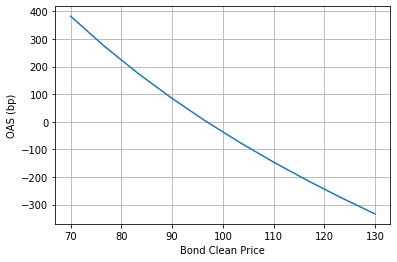

In [15]:
plt.plot(cleanPrices,oass*10000)
plt.xlabel("Bond Clean Price")
plt.ylabel("OAS (bp)")
plt.grid()

Copyright (c) 2020 Dominic O'Kane